# Generating and Visualizing Data

First, we generate a 3D dataset. This dataset will be structured such that it allows us to demonstrate the various aspects of PCA effectively.

In [4]:
# imports

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Generating a synthetic 3D dataset
np.random.seed(0)
X = np.dot(np.random.rand(100, 3), np.random.rand(3, 3))

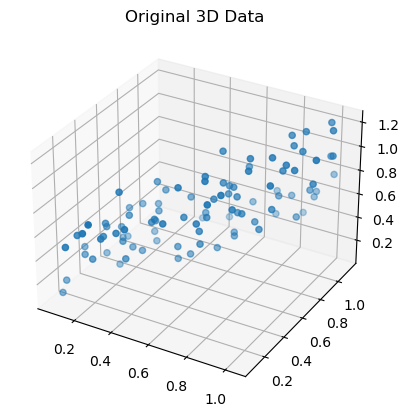

In [3]:
# Visualizing the original 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.title("Original 3D Data")
plt.show()

# Applying PCA and Exploring the variance ratio

Using Scikit-Learn's PCA, we reduce the dimensionality of our dataset. We'll also examine the explained variance ratio to understand how much information (variance) each principal component holds.

In [5]:
# Applying PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.83350234 0.13910518 0.02739248]


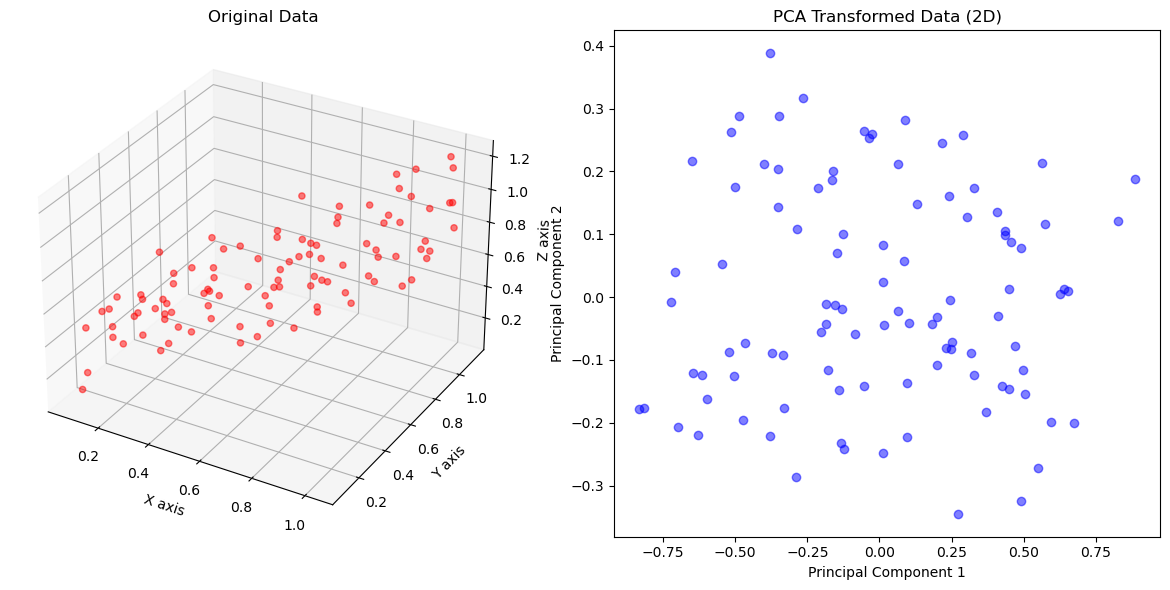

In [17]:
# Plotting Original Data vs. PCA Transformed Data
fig = plt.figure(figsize=(12, 6))
# Plotting the Original 3D Data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], color='red', alpha=0.5)
ax1.set_title("Original Data")
ax1.set_xlabel("X axis")
ax1.set_ylabel("Y axis")
ax1.set_zlabel("Z axis")

# Plotting the PCA Transformed 2D Data
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.5)
ax2.set_title("PCA Transformed Data (2D)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

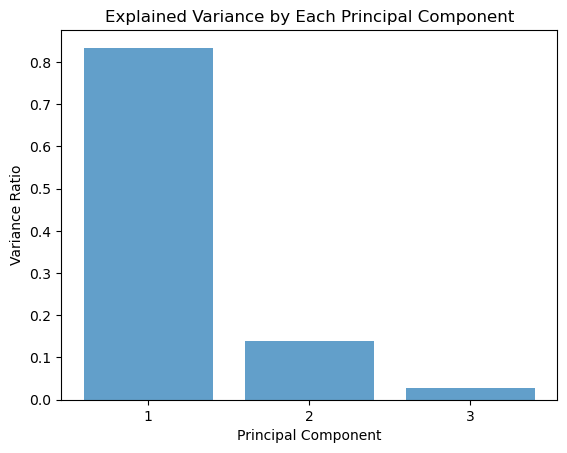

In [10]:
# Creating a bar chart for the Explained Variance Ratio
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

# Choosing the right number of dimensions

In [7]:
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)
# Determining the number of components to reach 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance:", n_components_95)

Number of components to retain 95% variance: 2


# PCA for Compression and Re-Construction 

In [8]:
# Reducing dimensions for compression
pca_95 = PCA(n_components=n_components_95)
X_reduced = pca_95.fit_transform(X)

# Reconstructing the data from the compressed form
X_reconstructed = pca_95.inverse_transform(X_reduced)

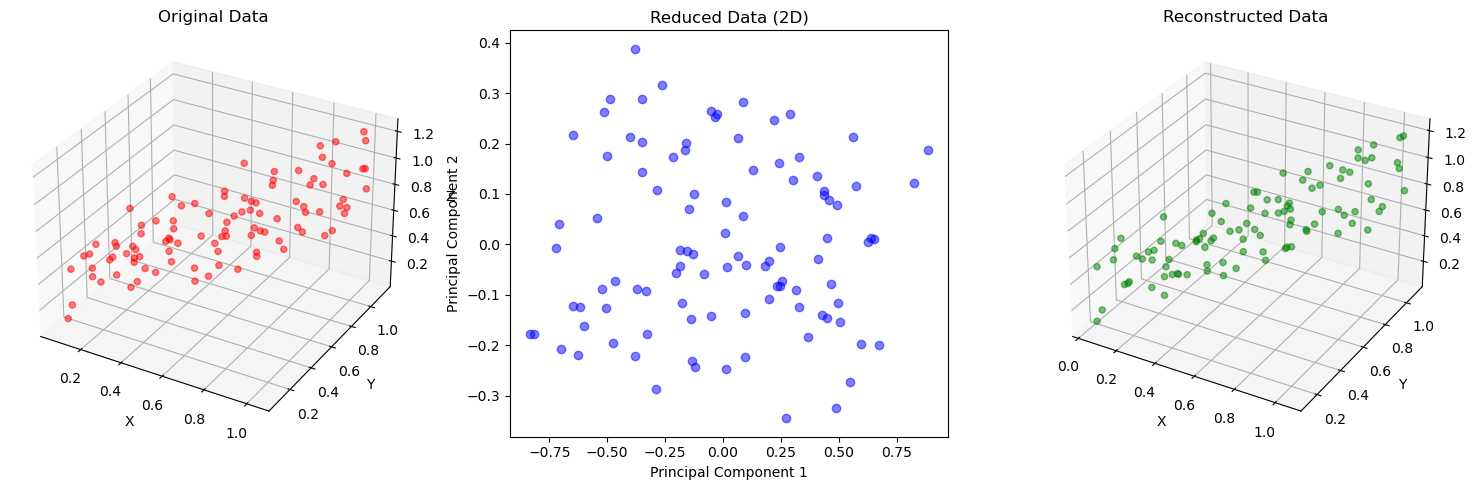

In [11]:
# Plotting Original Data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], color='red', alpha=0.5)
ax1.set_title("Original Data")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Plotting Reduced Data
ax2 = fig.add_subplot(132)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], color='blue', alpha=0.5)
ax2.set_title("Reduced Data (2D)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

# Plotting Reconstructed Data
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2], color='green', alpha=0.5)
ax3.set_title("Reconstructed Data")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

plt.tight_layout()
plt.show()

# Randomised PCA and Incremental PCA

In [9]:
from sklearn.decomposition import IncrementalPCA, PCA

# Randomized PCA
randomized_pca = PCA(n_components=n_components_95, svd_solver='randomized')
X_reduced_randomized = randomized_pca.fit_transform(X)

# Incremental PCA
incremental_pca = IncrementalPCA(n_components=n_components_95)
X_reduced_incremental = incremental_pca.fit_transform(X)

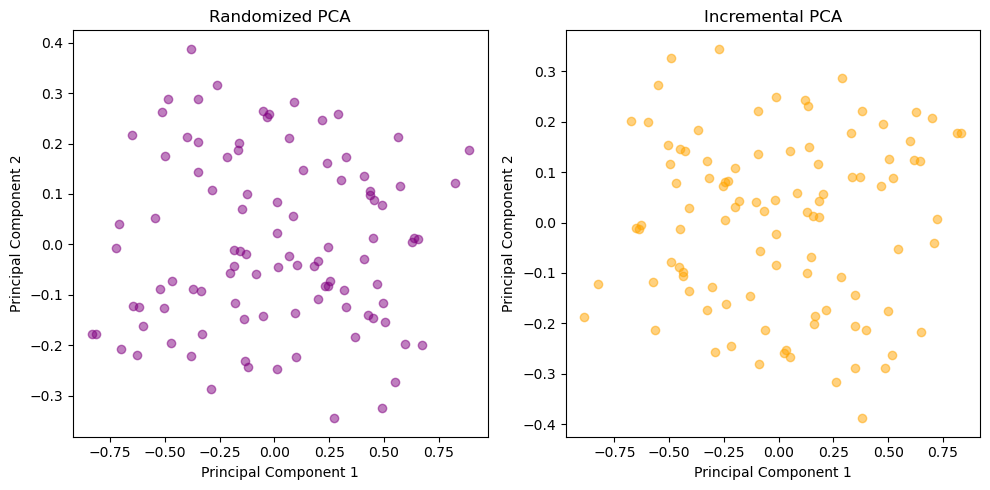

In [12]:
# Plotting Results of Randomized PCA and Incremental PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Randomized PCA
ax1.scatter(X_reduced_randomized[:, 0], X_reduced_randomized[:, 1], color='purple', alpha=0.5)
ax1.set_title("Randomized PCA")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")

# Incremental PCA
ax2.scatter(X_reduced_incremental[:, 0], X_reduced_incremental[:, 1], color='orange', alpha=0.5)
ax2.set_title("Incremental PCA")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
